In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

## The Max-Light Composite

In [4]:
%matplotlib inline

In [5]:
query_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase <= 1"]

In [8]:
composites_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot='b', medmean=1, gini_balance = True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase <= 1
99 questionable files currently ignored
(7, 'questionable spectra removed', 199, 'spectra left')
(5, 'Peculiar Ias removed', 194, 'spectra left')
156 valid spectra found
Arrays cleaned
4 spectra may have telluric contamination
103 total SNe
101 SNs with host corrections
Gini balancing...
Balanced after 28 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  0.1289660207
dm15:  1.15584847229
Redshift:  0.0135378857446


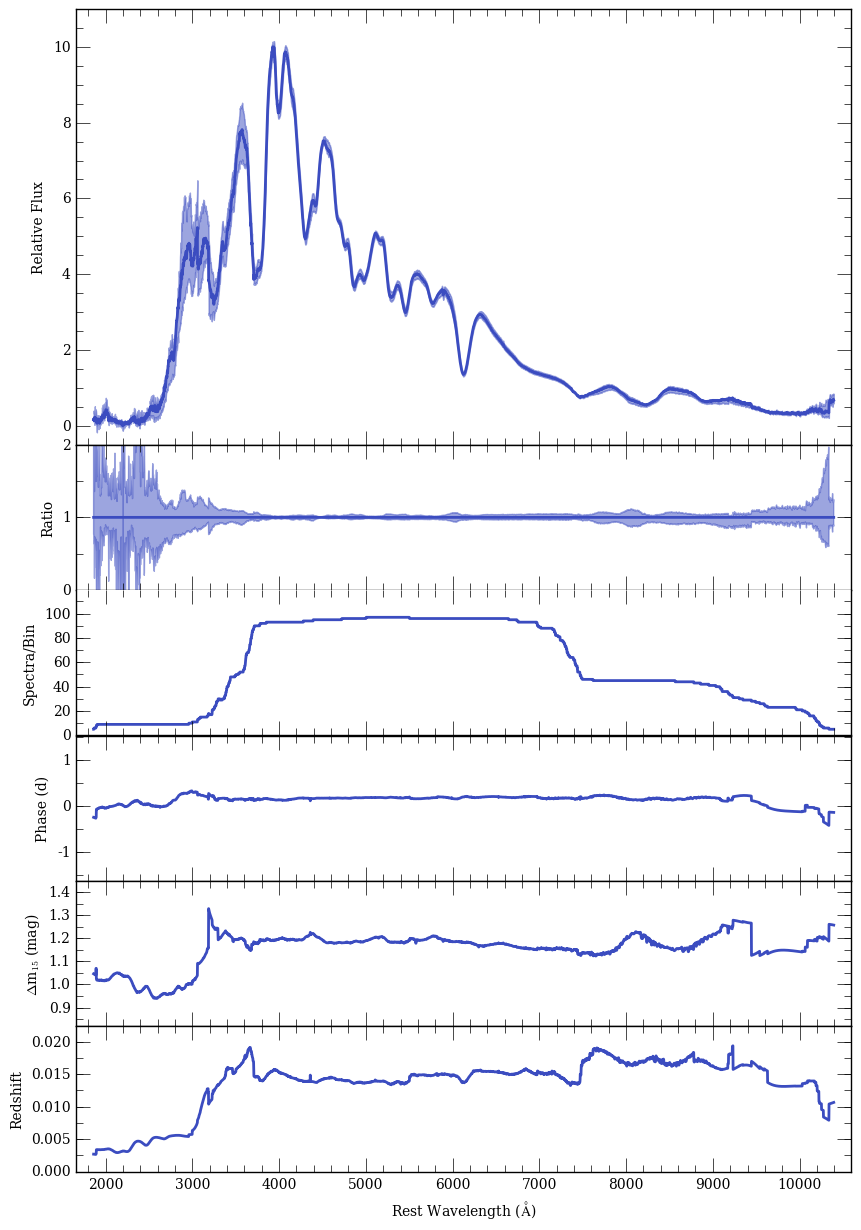

In [9]:
# query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5, savename='main_composites_updated/maximum_light_all_dm15')
query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5)
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=10, legend_labels = ['$-1 \leq$ phase $\leq 1$ (days)'])

In [56]:
query_strings_all = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10 and phase < -9",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -9 and phase < -8",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8 and phase < -7",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -7 and phase < -6",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6 and phase < -5",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -5 and phase < -4",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4 and phase < -3",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -3 and phase < -2",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2 and phase < -1",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 0",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 0 and phase < 1",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 1 and phase < 2",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 2 and phase < 3",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 3 and phase < 4",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 4 and phase < 5",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 5 and phase < 6",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 6 and phase < 7",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 7 and phase < 8",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 8 and phase < 9",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 9 and phase < 10",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 10 and phase < 11",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 11 and phase < 12",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 12 and phase < 13",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 13 and phase < 14",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 14 and phase < 15",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 15 and phase < 16",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 16 and phase < 17",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 17 and phase < 18",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 18 and phase < 19",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 19 and phase < 20",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 20 and phase < 21",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 21 and phase < 22",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 22 and phase < 23",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 23 and phase < 24",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 24 and phase < 25",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 25 and phase < 26",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 26 and phase < 27",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 27 and phase < 28",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 29",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 29 and phase < 30",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 30 and phase < 32",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 32 and phase < 34",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 34 and phase < 36",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 36 and phase < 38",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 38 and phase < 40",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 40 and phase < 42",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 42 and phase < 44",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 44 and phase < 46",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 46 and phase < 49",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 49 and phase < 52",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 52 and phase < 55",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 55 and phase < 58",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 58 and phase < 61",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 61 and phase < 65",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 65 and phase < 70",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 70 and phase < 78",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 78 and phase < 88",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 88 and phase < 98",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 98 and phase < 125",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 125 and phase < 180",
                 "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 180"
                ]

In [143]:
#changeable phase bin size
query_strings = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10."]
max_phase = 16.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    query_strings.append("SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings

['SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT

In [ ]:
composites, sn_arrays, boot_sn_arrays = query_db.main(len(query_strings), query_strings, boot='b', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10.
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
102 questionable files currently ignored
(3, 'questionable spectra removed', 87, 'spectra left')
(0, 'Peculiar Ias removed', 87, 'spectra left')
75 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
34 total SNe
34 SNs with host corrections
Gini balancing...
Balanced after 20 iterations
Bootstrapping
None
None


In [ ]:
composites_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_strings), query_strings, boot='b', medmean=2, verbose=False)

In [11]:
sn_arr = sn_arrays[0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))

0.296025363683
1885.39112553
0.0230302827905
12.8537441931


In [127]:
def stacked_plot(composites, boot=True, name = '', savename=None):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Constant', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
#     fig.set_size_inches(10.5, 80.5, forward = True) #long plot
#     fig.set_size_inches(10.5, 7.5, forward = True)
    fig.set_size_inches(10, 15, forward = True) #paper plot
    plt.gca().axes.yaxis.set_ticklabels([])

    i = 0
    if boot:
        lw=3
    else:
        lw=3
    for comp in composites:
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
#         buff = 200*np.log10(phase+20)
        buff  = i
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.*comp.flux[comp.x1:comp.x2] - buff, color = '#3F5D7D', linewidth = lw)
        if boot:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2]- buff, comp.up_conf[comp.x1:comp.x2] - buff, alpha = 0.5)
        if phase < 0:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " $-$%2.1f" % (np.absolute(phase)), fontname='stixsans', horizontalalignment = 'right')
        else:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " %+2.1f" % (phase), fontname='stixsans', horizontalalignment = 'right')
#         plt.title('All Phase Composite Spectra', fontdict = font1, fontsize = 40)
        i+=1
    plt.ylim([len(composites)*-1., 2.2])
    plt.xlim([3000, 11000])
#     majorLocator = MultipleLocator(1000)
#     majorFormatter = FormatStrFormatter('%i')
    minorLocator = MultipleLocator(200)
    plt.gca().axes.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.gca().axes.xaxis.set_major_formatter(majorFormatter)
#     plt.gca().axes.xaxis.set_minor_locator(minorLocator)
    labels=plt.gca().axes.get_xticks().tolist()
    new_labels = []
    for s in labels:
        new_labels.append(str(int(s)))
    labels = new_labels
    labels[0]=''
    labels[-1]=''
#     labels[1]=''
#     labels[-2]=''
    print labels
    plt.gca().set_xticklabels(labels)
#     plt.savefig('../../../Paper_Drafts/main_composites/all_t_spec_eq_spaced_long.pdf', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('../../FLASH/t_spec_eq_spaced'+name+'.png', dpi = 400, bbox_inches = 'tight')
    if savename is not None:
        plt.savefig('../../../Paper_Drafts/'+ savename, dpi = 300, bbox_inches = 'tight')
    plt.show()

In [100]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot='nb', medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase < -10
ERROR:  2002bo_20020313_3360_7726_00.dat None
ERROR:  sn2006oa-20061116-not.dat None
102 questionable files currently ignored
(3, 'questionable spectra removed', 87, 'spectra left')
(0, 'Peculiar Ias removed', 87, 'spectra left')
75 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination


composite.py:1114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  template.flux = template.flux*norm
composite.py:1151: RuntimeWarning: divide by zero encountered in divide
  template.minwave   = None


34 total SNe
34 SNs with host corrections
Gini balancing...
Balanced after 20 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -10 and phase < -9
ERROR:  2002bo_20020314_0_2_00.dat None
102 questionable files currently ignored
(1, 'questionable spectra removed', 47, 'spectra left')
(1, 'Peculiar Ias removed', 46, 'spectra left')
42 valid spectra found
Arrays cleaned
1 spectra may have telluric contamination
35 total SNe
34 SNs with host corrections
Gini balancing...
Balanced after 7 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -9 and phase < -8
102 questionable files currently ignored
(1, 'questionable spectra removed', 71, 'spectra left')
(2, 'Peculiar Ias removed', 69, 'spectra left')
56 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
44 total SNe
42 SNs with host corrections
Gini balancing...
Balanced after 7 iterations


composite.py:605: RuntimeWarning: invalid value encountered in sqrt
  if find_RMSE:


47 total SNe
45 SNs with host corrections
Gini balancing...
Balanced after 16 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -7 and phase < -6
102 questionable files currently ignored
(6, 'questionable spectra removed', 78, 'spectra left')
(1, 'Peculiar Ias removed', 77, 'spectra left')
59 valid spectra found
Arrays cleaned
1 spectra may have telluric contamination
48 total SNe
46 SNs with host corrections
Gini balancing...
Balanced after 13 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -6 and phase < -5
102 questionable files currently ignored
(1, 'questionable spectra removed', 96, 'spectra left')
(2, 'Peculiar Ias removed', 94, 'spectra left')
82 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
65 total SNe
63 SNs with host corrections
Gini balancing...
Balanced after 18 iterations
SQL Query: SELECT * from Supernovae inn

composite.py:1151: RuntimeWarning: invalid value encountered in sqrt
  template.minwave   = None


31 total SNe
30 SNs with host corrections
Gini balancing...
Balanced after 13 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 27 and phase < 28
102 questionable files currently ignored
(4, 'questionable spectra removed', 47, 'spectra left')
(1, 'Peculiar Ias removed', 46, 'spectra left')
40 valid spectra found
Arrays cleaned
0 spectra may have telluric contamination
35 total SNe
33 SNs with host corrections
Gini balancing...
Balanced after 14 iterations
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= 28 and phase < 29
ERROR:  2002bo_20020421_0_2_00.dat None
102 questionable files currently ignored
(1, 'questionable spectra removed', 43, 'spectra left')
(2, 'Peculiar Ias removed', 41, 'spectra left')
34 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
30 total SNe
30 SNs with host corrections
Gini balancing...
Balanced after 12 iterations

In [129]:
import composite
# query_db.set_min_num_spec(composites, 5)
query_db.set_min_num_spec(composites_all, 5)
# print len(composites), len(composites_all)
# print np.average(composites_all[16].phase_array[composites_all[16].x1:composites_all[16].x2])
# plt.plot(composites_all[16].wavelength, composites_all[16].flux)
# plt.show()

In [102]:
# sub_list_1 = composites_all[0:16]
# sub_list_2 = composites_all[16:33]
# sub_list_3 = composites_all[33:50]
# sub_list_4 = composites_all[50:57]
# sub_list_5 = composites_all[57:]
i = 5
sub_list_1 = composites_all[0:5]
sub_list_2 = composites_all[5:10]
sub_list_3 = composites_all[10:15]
sub_list_4 = composites_all[15:20]
sub_list_5 = composites_all[20:25]
sub_list_6 = composites_all[25:30]
sub_list_7 = composites_all[30:35]
sub_list_8 = composites_all[35:40]
sub_list_9 = composites_all[40:45]
sub_list_10 = composites_all[45:50]
sub_list_11 = composites_all[50:55]
sub_list_12 = composites_all[55:60]
sub_list_13 = composites_all[60:]

In [130]:
# stacked_plot(sub_list_1, boot=False, name = '1')

In [131]:
# stacked_plot(sub_list_2, boot=False, name = '2')

In [132]:
# stacked_plot(sub_list_3, boot=False, name = '3')

In [133]:
# stacked_plot(sub_list_4, boot=False, name = '4')

In [134]:
# stacked_plot(sub_list_5, boot=False,name = '5')

In [135]:
# stacked_plot(sub_list_6, boot=False,name = '6')

In [136]:
# stacked_plot(sub_list_7, boot=False,name = '7')

In [137]:
# stacked_plot(sub_list_8, boot=False,name = '8')

In [138]:
# stacked_plot(sub_list_9, boot=False,name = '9')

In [139]:
# stacked_plot(sub_list_10, boot=False,name = '10')

In [140]:
# stacked_plot(sub_list_11, boot=False,name = '11')

In [141]:
# stacked_plot(sub_list_12, boot=False,name = '12')

In [142]:
# stacked_plot(sub_list_13, boot=False,name = '13')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


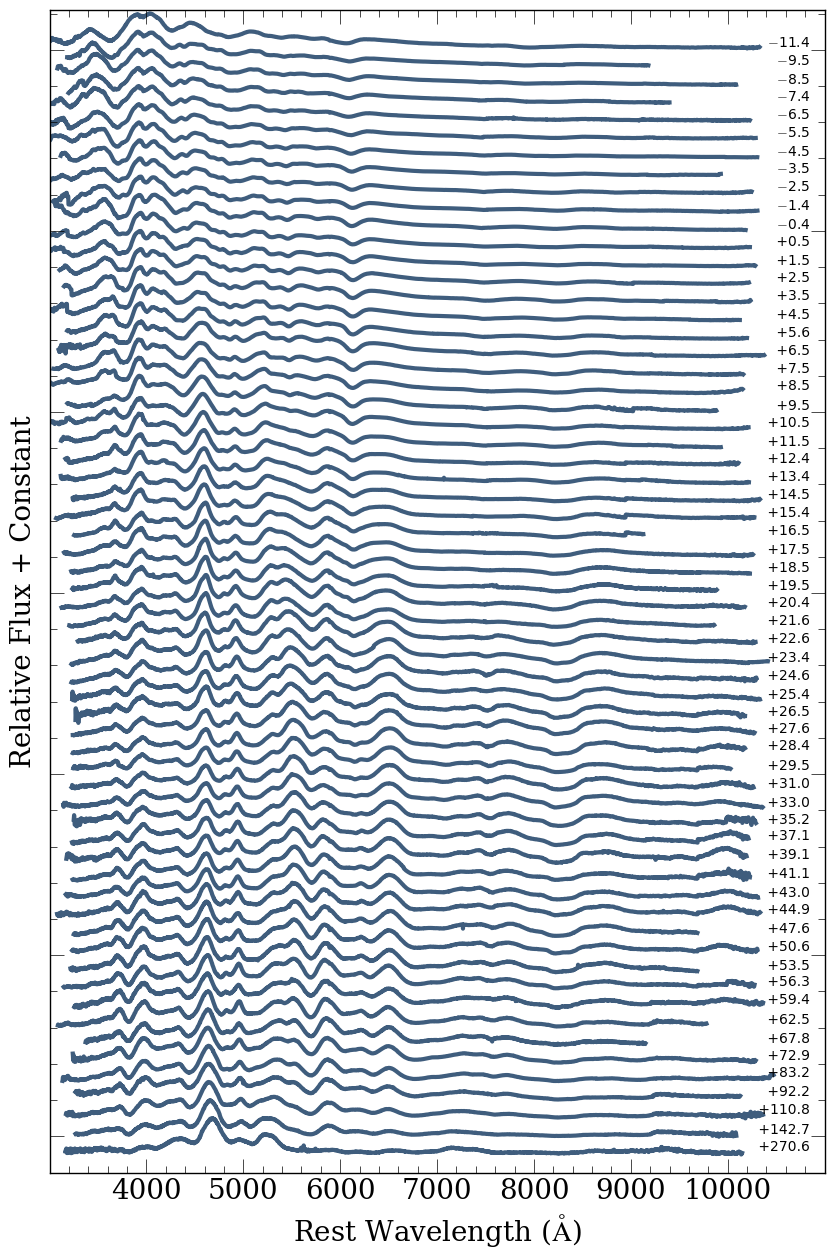

In [128]:
# stacked_plot(composites_all, boot=False, name = 'all', savename='main_composites_updated/all_t_spec_eq_spaced.pdf')
stacked_plot(composites_all, boot=False, name = 'all')

In [23]:
# query_db.plot_comp_and_all_spectra(composites[3],sn_arrays[3])

In [13]:
velocities = []
phases = []
dm15s = []
# weak_velocities = []
for comp in composites:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities.append(v)
    phases.append(p)
    dm15s.append(dm15)

In [14]:
velocities_med = []
phases_med = []
dm15s_med = []
# weak_velocities = []
for comp in composites_med:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities_med.append(v)
    phases_med.append(p)
    dm15s_med.append(dm15)

[1.02, 1.05, 1.0900000000000001, 1.1299999999999999, 1.2, 1.1499999999999999, 1.1000000000000001, 1.1699999999999999, 1.1599999999999999, 1.1899999999999999, 1.1299999999999999, 1.1399999999999999, 1.1100000000000001, 1.0700000000000001]
[13.450222249847707, 12.761570803155207, 12.663310110626821, 11.780292996003165, 11.388609178203332, 10.997398333424474, 10.704300675253513, 10.801970321149453, 10.606660605734399, 10.801970321149453, 10.801970321149453, 10.801970321149453, 10.606660605734399, 10.5090501147277]


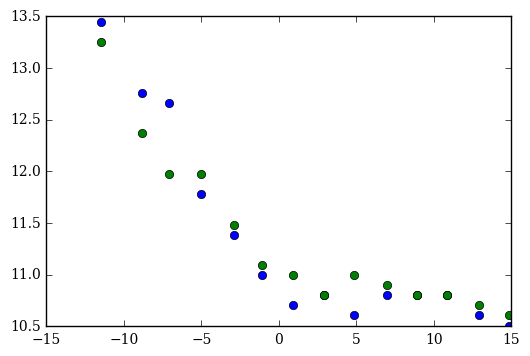

In [15]:
print dm15s
print velocities
plt.plot(phases, velocities, 'o')
plt.plot(phases, velocities_med, 'o')
# plt.plot(phases, weak_velocities, 'o')
plt.show()

In [16]:
boot_velocities = []
# boot_phases = []
# boot_dm15s = []
errors  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors.append(np.nanstd(vels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [17]:
boot_velocities_med = []
# boot_phases = []
# boot_dm15s = []
errors_med  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays_med[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays_med[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities_med.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors_med.append(np.nanstd(vels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [18]:
all_phases = []
all_vels = []
bad_vels = ['1995bd','2012cg','1991t','1998ab','2006oa','2009ig','2012fr','1995ac', '2001ah',
            '1997br','2008ia','2012ht','2007sr','2002do','2007ax','2003fa','1998aq','2011fe',
            '2003ai', '2005eq', '2002hu', '2002fk', '2005m']
bad_files = ['sn1999aa-19990213.35-fast.flm', 'sn1998es-19981115.25-fast.flm', 'sn1999dq-19990905.45-fast.flm']
i=0
sn_arr = sn_arrays[0:27][0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
for sn_arr in sn_arrays[0:27]:
# for sn_arr in sn_arrays:
    print i
    phase_bin = []
    vel_bin = []
    for SN in sn_arr:
        if SN.name not in bad_vels and SN.filename not in bad_files and SN.source != 'swift_uv':
            p = SN.phase
            var = 1./SN.ivar
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            v, si_min_wave = sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300., vexp=vexp)
            print SN.filename, vexp, SNR, SN.SNR, v, p
            phase_bin.append(p)
            vel_bin.append(v)
        else:
            phase_bin.append(np.nan)
            vel_bin.append(np.nan)
    all_phases.append(phase_bin)
    all_vels.append(vel_bin)
    i+=1

0.303039751492
2243.92718587
0.0211103590471
14.355025929
0


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in divide


sn1994D-19940310.36-mmt.flm 0.004 16.9633564667 77.1567878103 14436.5179638 -11.2029443405
sn1998dm-19980824-br-corrected.flm 0.003 32.2491812351 66.9252321843 11878.2878351 -11.7372967656
sn1999aa-19990212-uoi.flm 0.003 35.0915963334 34.6395369467 11976.3122233 -10.36233677
sn2002bo-20020311-ui-corrected.flm 0.003 29.3695653576 22.8452848507 17213.818978 -12.5388353382
sn2003kc-20031123-ui.flm 0.004 10.5625815504 10.2704071486 15128.6791586 -10.4309430339
sn2005cf-20050601.385-ui.flm 0.0045 2.22109545629 1.55068099591 15524.8479882 -10.8727511548
sn2006qo-20061201.436-ui.flm 0.004 19.2802682143 18.0067422376 12074.3661582 -10.9912611419
sn2007ca-20070426.305-ui.flm 0.004 15.6215413088 22.5154032334 12172.4496373 -10.2577149811
sn1997bq-19970408.14-mmt.flm 0.003 31.9401023211 44.1332597652 18711.141007 -11.467821738
sn1997do-19971102.46-fast.flm 0.003 31.6951364393 32.2081633676 18211.2997426 -11.7688987447
sn1997dt-19971123.19-fast.flm 0.002 40.0443348814 40.9417001454 13056.5300302 -

In [21]:
#errors after culling bad measurements. Need to change if updting composite method
errors[2] = .291
errors[7] = .127
errors[8] = .127
errors_med[4] = .144

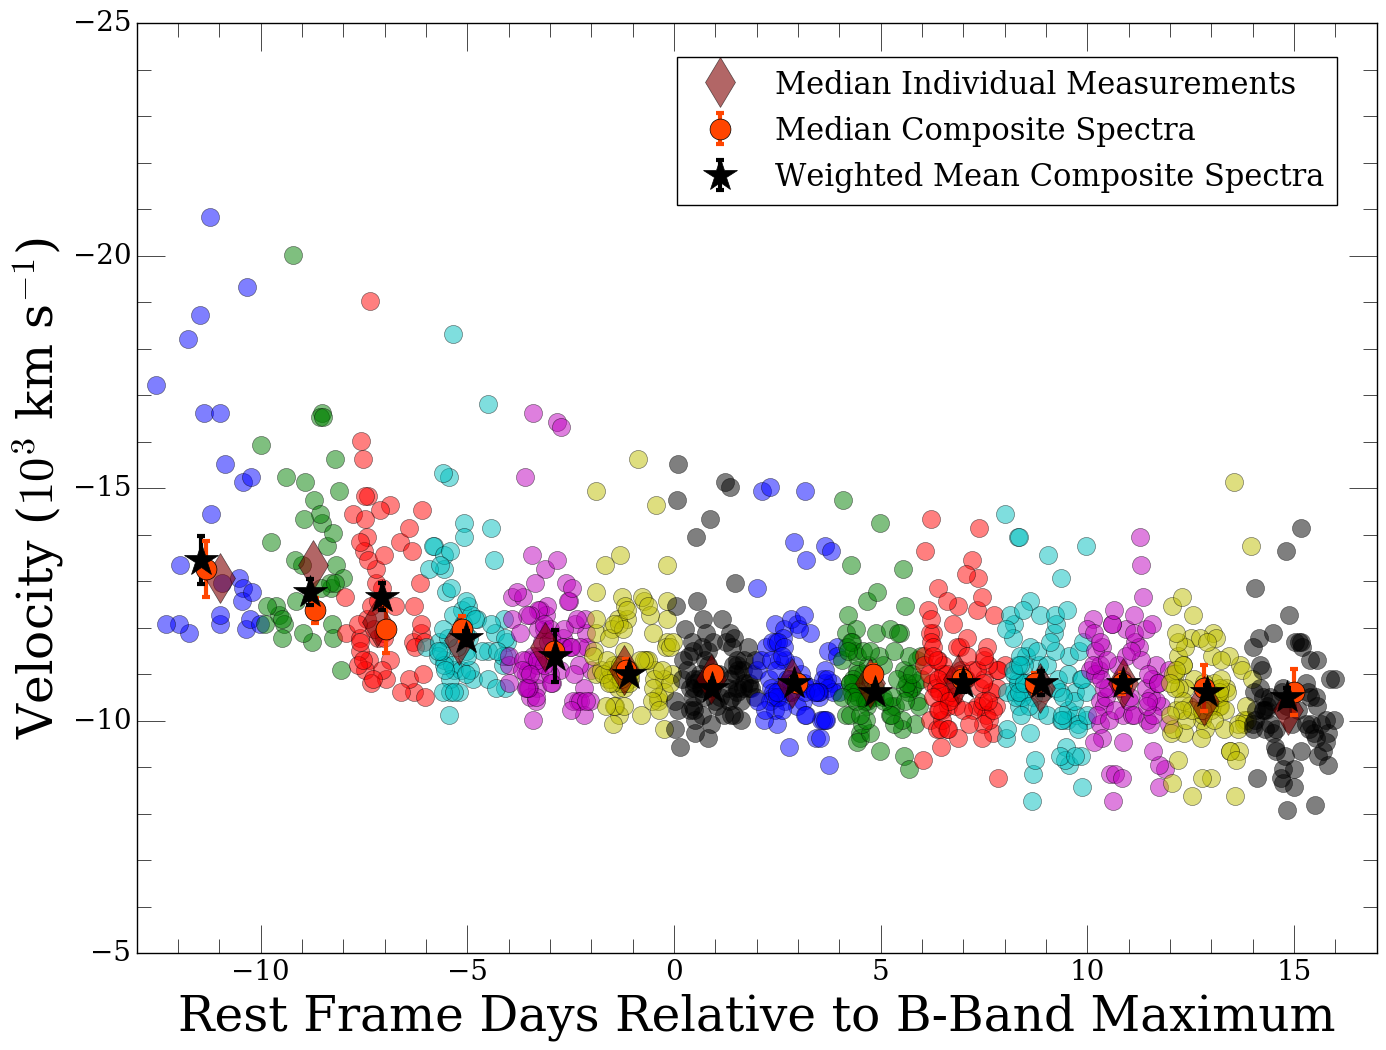

In [22]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Velocity ($10^3$ km s$^{-1}$)', fontsize = 35)
plt.xlabel('Rest Frame Days Relative to B-Band Maximum', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
vel_bin_medians = []
phase_bin_medians = []
for i in range(len(all_phases)):
    phase_bin_medians.append(np.nanmedian(all_phases[i]))
    vel_bin_medians.append(np.nanmedian(all_vels[i])/-1000.)
    plt.plot(all_phases[i], np.asarray(all_vels[i])/-1000., 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(phase_bin_medians, vel_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(phases_med, -1.*np.asarray(velocities_med), yerr=errors_med, color = 'orangered',fmt='o', markersize=15, elinewidth=3, capthick=3,  label='Median Composite Spectra')
plt.errorbar(phases, -1.*np.asarray(velocities), yerr=errors, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
# plt.savefig('../../../Paper_Drafts/main_composites/velocity.pdf', dpi = 300, bbox_inches = 'tight')
plt.xlim([-13,17])
plt.ylim([-25,-5])
plt.gca().invert_yaxis()
# plt.legend(loc=1, fontsize = 20, numpoints=1)
plt.legend( loc=1, bbox_to_anchor=(0.5, 0.5, 0.48, 0.48), fontsize=22, numpoints=1)
# plt.ylim([8,22])
plt.savefig('../../../Paper_Drafts/main_composites_updated/velocity_2_day_cut.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/velocity_2_day_cut.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [41]:
import numpy as np

1.19918760317
0.14432374195


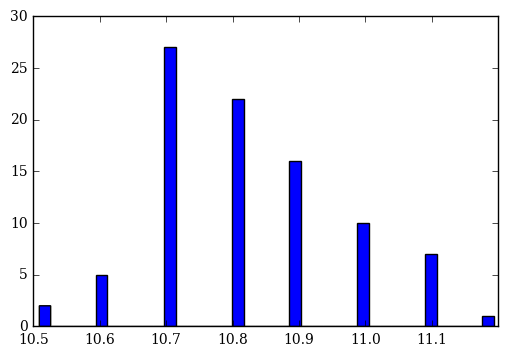

In [28]:
print np.nanstd(boot_velocities_med[4])
new_vs = []
for v in boot_velocities[8]:
    if ~np.isnan(v) and v < 16:
        new_vs.append(v)
print np.nanstd(new_vs)
# plt.hist(np.asarray(boot_velocities[8])[~np.isnan(np.asarray(boot_velocities[8]))], bins=40)
plt.hist(new_vs, bins=40)
plt.show()

In [ ]:
check_SN_vels = []
j = 0
for i in range(len(all_vels)):
    for k in range(len(all_vels[i])):
        v = all_vels[i][k]
        SN = sn_arrays[i][k]
#         if v/1000. > 17:
        if SN.phase < -13:
            print j, SN.name, SN.filename, SN.phase, SN.redshift, SN.velocity, v/1000.
            check_SN_vels.append(SN)
            j+=1

In [ ]:
plt.plot(check_SN_vels[0].wavelength, check_SN_vels[0].flux)
plt.show()

In [ ]:
SN = check_SN_vels[13]
sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300.)

## Zoom In Plots

In [23]:
import matplotlib.gridspec as gridspec

In [27]:
def zoom_in_plot(lst):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
    
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Const.', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    fig.set_size_inches(8.5, 11, forward = True)
    plt.gca().axes.yaxis.set_ticklabels([])
    
    
    ca_si_range = [3400., 4400.]
    si_range = [5500., 6500.]
    nir_trip_range = [7500., 9000]
    
    gs = gridspec.GridSpec(1, 3)
    fig.text(0.45, 0.08, 'Rest Wavelength ' + "($\mathrm{\AA}$)", ha='center', fontsize=15)
#     s_m = query_db.make_colorbar(lst)
    
    params = []
    for comp in lst:
        params.append(np.average(comp.phase_array[comp.x1:comp.x2]))

    norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    # c_m = matplotlib.cm.viridis
    c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])
    
    i = 0
    for comp in lst:
        buff=i
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
        
        ca_si_inds = np.where((comp.wavelength >= ca_si_range[0]) & (comp.wavelength <= ca_si_range[1]))
        si_inds = np.where((comp.wavelength >= si_range[0]) & (comp.wavelength <= si_range[1]))
        nir_trip_inds = np.where((comp.wavelength >= nir_trip_range[0]) & (comp.wavelength <= nir_trip_range[1]))

        ca_si = plt.subplot(gs[0])
        ca_si.axes.set_title("Ca/Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         ca_si.axes.xaxis.set_ticks(np.arange(ca_si_range[0], ca_si_range[1], 1000))
        plt.plot(comp.wavelength[ca_si_inds], 1.5*comp.flux[ca_si_inds]- i, 'b-', linewidth = 4, color = s_m.to_rgba(phase))
        plt.ylabel('Relative Flux + Constant', fontsize = 15)
        
        si = plt.subplot(gs[1])
        si.axes.set_title("Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         si.axes.xaxis.set_ticks(np.arange(si_range[0], si_range[1], 1000))
        plt.plot(comp.wavelength[si_inds], 3.*comp.flux[si_inds] - i, 'g-', linewidth = 4, color = s_m.to_rgba(phase))
        
        nir_trip = plt.subplot(gs[2])
        nir_trip.axes.set_title("Ca NIR Triplet", fontsize = 15)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.xticks(rotation=0, fontsize = 10)
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         nir_trip.axes.xaxis.set_ticks(np.arange(nir_trip_range[0], nir_trip_range[1], 1000))
        plt.plot(comp.wavelength[nir_trip_inds], 5.*comp.flux[nir_trip_inds] - i, 'r-', linewidth = 4, color = s_m.to_rgba(phase))
        
        i+=1
        
    cb = plt.colorbar(s_m, ax = fig.axes, aspect=50)
    cb.set_label('Phase (days)', fontsize = 15)
    cb.ax.tick_params(labelsize=10)
    cb.ax.invert_yaxis()
    
    ca_si.axes.set_ylim([len(composites)*-1. + 1., 1.75])
    si.axes.set_ylim([len(composites)*-1. + 1.3, 1.5])
    nir_trip.axes.set_ylim([len(composites)*-1. + .9, 1.])
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ca_si.axes.xaxis.set_major_locator(majorLocator)
    ca_si.axes.xaxis.set_major_formatter(majorFormatter)
    ca_si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    si.axes.xaxis.set_major_locator(majorLocator)
    si.axes.xaxis.set_major_formatter(majorFormatter)
    si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(400)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    nir_trip.axes.xaxis.set_major_locator(majorLocator)
    nir_trip.axes.xaxis.set_major_formatter(majorFormatter)
    nir_trip.axes.xaxis.set_minor_locator(minorLocator)
        
    
#     ca_si.axes.set_xlim([])
    si.axes.set_xlim([5500.,6500.])
    nir_trip.axes.set_xlim([7500.,8900.])
    plt.savefig('../../../Paper_Drafts/main_composites_updated/zoom_in.pdf', dpi = 300, bbox_inches = 'tight')
    plt.show()

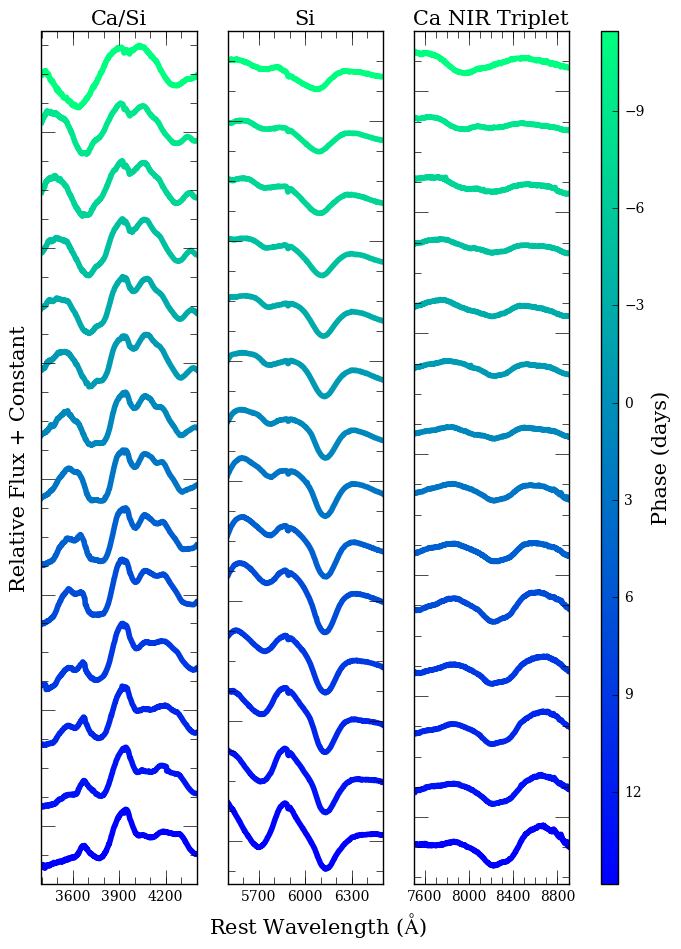

In [28]:
zoom_list = composites[0:26]
zoom_in_plot(zoom_list)